# Projeto Final de Mineração de Dados

## Alunos: Fabrício Moreno da Silva & Ynnayron Juan Lopes da Silva

## Professor: Paulo Ribeiro Lins Júnior

---

# Objetivo do Projeto

### O objetivo deste projeto é utilizar inteligência artificial (IA) para prever a taxa de churn em uma empresa, identificando padrões e fatores que possam levar à perda de clientes. Com base nessas previsões, o projeto visa ajudar a propor estratégias e soluções eficazes para reduzir o churn, ajudando a empresa a reter seus clientes e otimizar seus processos de fidelização.

---

# Seguindo os passos para chegar nos resultados:

In [4]:
import pandas as pd
import numpy as np
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df_telecom = pd.read_csv('churn_projeto_final.csv')
df_telecom.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# EXPLORAÇÃO E GERAÇÃO DE INSIGHTS


In [ ]:
df_telecom.isnull().sum()

,0
state,0
account length,0
area code,0
phone number,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
total day calls,0
total day charge,0


### Como pode ser visto, não há nenhum dado nulo presente, o que facilita nosso trabalho e não precisa de tratamento de dados

---

## Distribuição do Churn

In [ ]:
churn_distribution = df_telecom['churn'].value_counts(normalize=True) * 100
churn_distribution

,proportion
churn,
False,85.508551
True,14.491449


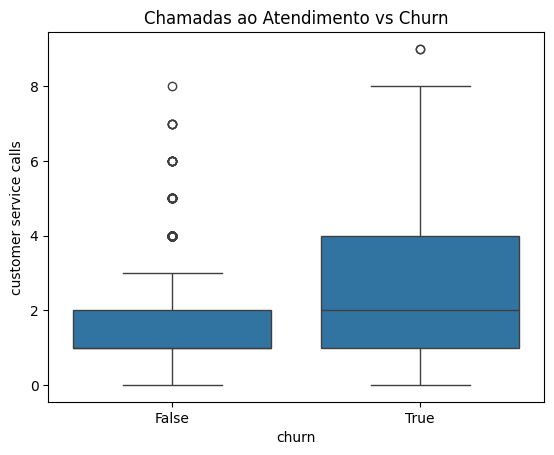

In [ ]:
# Analisando o impacto de chamadas ao serviço de atendimento ao cliente no churn

sns.boxplot(x='churn', y='customer service calls', data=df_telecom)
plt.title('Chamadas ao Atendimento vs Churn')
plt.show()

In [ ]:
# Tabela cruzada entre plano internacional e churn
international_plan_churn = pd.crosstab(df_telecom['international plan'], df_telecom['churn'], normalize='index') * 100
international_plan_churn

churn,False,True
international plan,,
no,88.504983,11.495017
yes,57.585139,42.414861


---

### Nesse passo, vemos a diferença de churns ocorridos por estado, podendo, assim, descobrir em qual local os esforços futuros devem ser focados, buscando reduzir esse número no cancelamento de planos

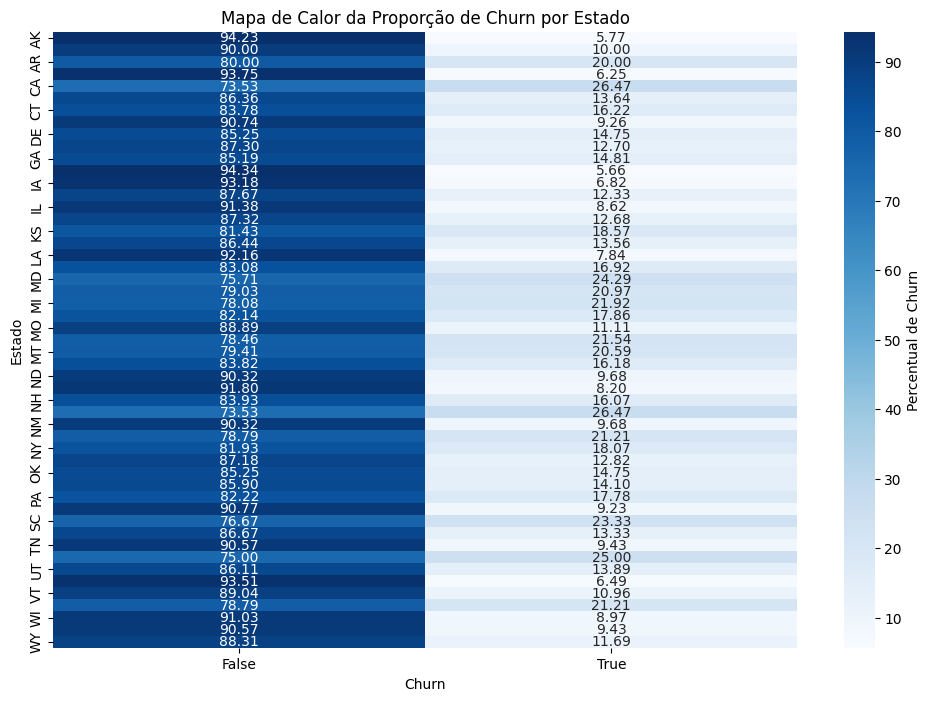

In [ ]:
# Ajustar os dados para criar um mapa de calor por estado e churn
state_churn = pd.crosstab(df_telecom['state'], df_telecom['churn'], normalize='index') * 100

# Criar o mapa de calor
plt.figure(figsize=(12,8))
sns.heatmap(state_churn, annot=True, cmap="Blues", fmt='.2f', cbar_kws={'label': 'Percentual de Churn'})
plt.title('Mapa de Calor da Proporção de Churn por Estado')
plt.ylabel('Estado')
plt.xlabel('Churn')
plt.show()

---

### Já o gráfico a seguir, determina a diferença de pessoas que cancelaram ou não os planos, de acordo com o tempo com o qual já contavam com os serviços da empresa



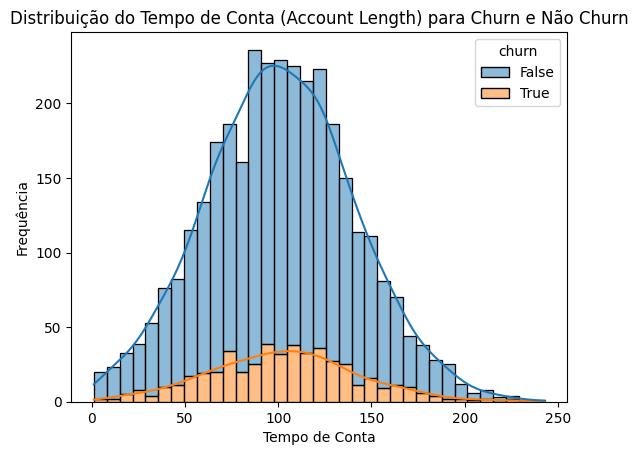

In [ ]:
# Gráfico de distribuição do tempo de conta para clientes que cancelaram e não cancelaram
sns.histplot(data=df_telecom, x='account length', hue='churn', multiple='stack', kde=True)
plt.title('Distribuição do Tempo de Conta (Account Length) para Churn e Não Churn')
plt.xlabel('Tempo de Conta')
plt.ylabel('Frequência')
plt.show()


---
### Com mais uma análise sendo feita, agora mostramos como a presença do plano com Correio de Voz pode ter influenciado desições de cancelamento passadas

churn                False      True 
voice mail plan                      
no               83.284944  16.715056
yes              91.323210   8.676790


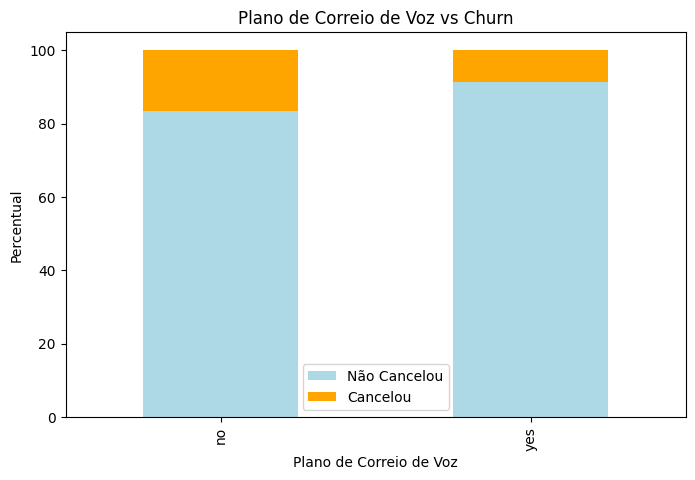

In [ ]:
 sw# Tabela cruzada entre plano de correio de voz e churn
voice_mail_churn = pd.crosstab(df_telecom['voice mail plan'], df_telecom['churn'], normalize='index') * 100
print(voice_mail_churn)

# Visualizar graficamente
voice_mail_churn.plot(kind='bar', stacked=True, figsize=(8,5), color=['lightblue', 'orange'])
plt.title('Plano de Correio de Voz vs Churn')
plt.ylabel('Percentual')
plt.xlabel('Plano de Correio de Voz')
plt.legend(['Não Cancelou', 'Cancelou'])
plt.show()
